# Project Name: Titanic - Machine Learning from Disaster

In this notebook, we perform an Exploratory Data Analysis (EDA) on the Titanic dataset to gain insights into the factors that contributed to passenger survival during the tragic sinking of the Titanic on April 15, 1912. The goal of this analysis is to explore the dataset, clean it, visualize relationships between key features, and generate insights that will help predict the likelihood of survival based on passenger characteristics.

# 1.Problem Definition:

How we can understand the relationships between various passenger features in the dataset (e.g., age, socio-economic class, gender, etc.) and their survival chances during the incident. This EDA aims to reveal correlations within the dataset.

# 2.Data

The dataset used in this project is sourced from Kaggle's "Titanic - Machine Learning from Disaster" competition. The dataset includes the following files:
* train.csv: The training dataset, containing passenger characteristics along with the ground truth (whether they survived or not).
* test.csv: The testing dataset, where the goal is to use the trained model to predict survival outcomes.
* gender_submission.csv: A sample submission file that shows the expected format of the predictions to be uploaded as the final result.

# 3. Approach

In this EDA we will:

* Examine the data for missing values.
* Analyze the relationships between features.
* Visualize the data using plots like heatmaps, bar charts, histograms etc.
* Perform Feature Engineering to create new variables from existing data.
* Assess correlations to identify which features are most strongly related to survival. 

# 4. Features

The dataset contains the following features:
* PassengerId: Unique ID of each passenger
* Survived: Did the passenger survive? (0 for no, 1 for yes)
* Sex: If the person is Male or Female
* Age: The age of the person
* Pclass: Ticket class of the passenger (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sibsp: The number of siblings / spouses onboard
* Parch: The number of parents / children onboard
* Ticket: Ticket Number
* Fare: The price of the ticket
* Cabin: The cabin number of the passenger
* Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


### Import the necessary libraries to analyze data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the training data 

In [2]:
train_df = pd.read_csv('data/train.csv')

In [3]:
# Get the info of the dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Lets find out how many passengers survived and how many didnt survive
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

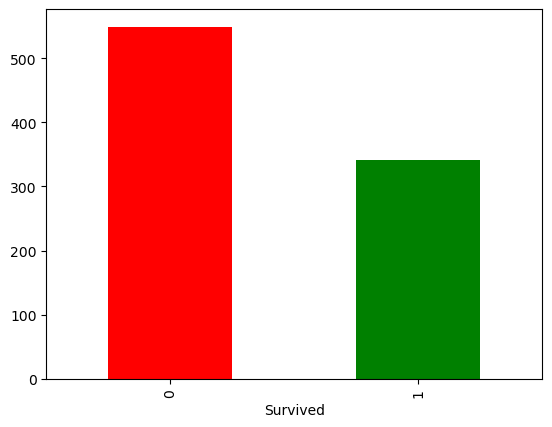

In [6]:
# Lets plot a graph to see how many survived and how many did not 
train_df.Survived.value_counts().plot(kind= 'bar', color = ['red', 'green'])

In [7]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Find if null values exist (for clean up)

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Let's find the correlation between 'Survived' and other features

In [9]:
# Compare Survived with Sex Column

pd.crosstab(train_df.Survived, train_df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


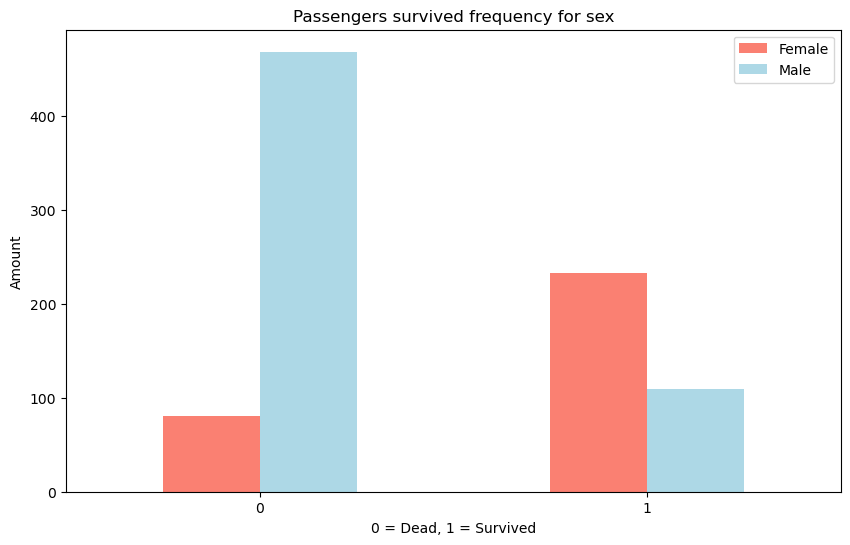

In [10]:
# Create a plot of crosstab 

pd.crosstab(train_df.Survived, train_df.Sex).plot(kind = 'bar', figsize = (10, 6), color = ['salmon', 'lightblue'])
plt.title('Passengers survived frequency for sex')
plt.xlabel('0 = Dead, 1 = Survived')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

The data indicates that more females survived, lets explore other features too.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

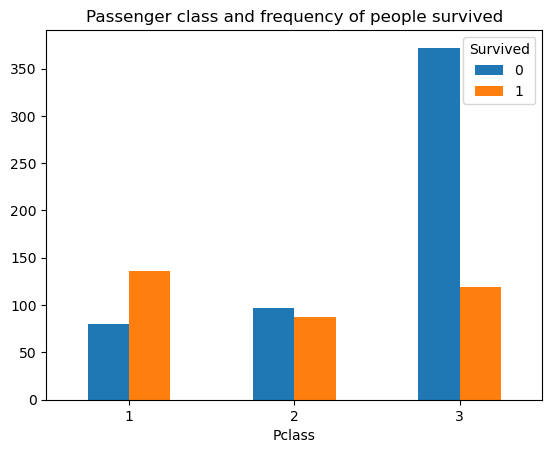

In [11]:
# Plot PClass and Survived

pd.crosstab(train_df['Pclass'], train_df['Survived']).plot(kind = 'bar')
plt.title('Passenger class and frequency of people survived')
plt.xticks(rotation = 0)

Before we do more EDA we need to impute certain values and fill NA values, lets start with filling age

First let's create a new column for Title, so that we can predict age using the Title

In [12]:
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.')  # Use raw string notation for the regex

In [13]:
train_df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [14]:
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

We can use the titles of the passengers to guess their ages

### Why Use Titles?
Titles often carry information about the passenger's social status, gender, or role (e.g., "Mr" for adult males, "Miss" for young females). These titles can be useful in predicting the likely age of a passenger. For example:
- **Mr**: Likely to represent adult males, so the median age for this group can be used for missing ages of male passengers.
- **Miss**: Often used for younger females, so the median age for this group might be lower than for males.
- **Master**: Typically used for young boys, so the median age for this group is expected to be even lower.

#### How the Imputation Works:
1. We group the passengers by their **Title**.
2. For each group, we calculate the **median age**.
3. We then use the median age of the respective group to fill in any missing values in the **Age** column for that group.


https://www.kaggle.com/code/allohvk/titanic-missing-age-imputation-tutorial-advanced

In [15]:
# Group rare titles into a single category
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Don', 'Jonkheer', 'Rev', 
                                                'Capt', 'Col', 'Major', 'Dr'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Ms', 'Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [16]:
train_df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [17]:
train_df['Age'] = train_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


In [18]:
train_df.Title.value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       22
Sir         1
Name: count, dtype: int64

In [19]:
train_df = train_df.drop('Name', axis = 1)

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
train_df = train_df.drop('Cabin', axis = 1)

In [22]:
train_df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


# Convert string data to categories

In [23]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,S,Mr


In [25]:
train_df.Title.value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       22
Sir         1
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

In [27]:
one_hot = OneHotEncoder(sparse_output= False)
encoded_titles = one_hot.fit_transform(train_df[['Title']])  # Pass as 2D array


In [28]:
encoded_titles

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [29]:
encoded_df = pd.DataFrame(encoded_titles, columns=one_hot.get_feature_names_out(['Title']))


In [30]:
encoded_df

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,1.0,0.0
887,0.0,1.0,0.0,0.0,0.0,0.0
888,0.0,1.0,0.0,0.0,0.0,0.0
889,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
train_df = pd.concat([train_df, encoded_df], axis=1)
train_df.drop('Title', axis=1, inplace=True)


In [32]:
grouped_by_ticket = train_df.groupby('Ticket').size().reset_index(name='Group_Size')
grouped_by_ticket

,Ticket,Group_Size
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1
...,...,...
676,W./C. 6608,4
677,W./C. 6609,1
678,W.E.P. 5734,1
679,W/C 14208,1


In [33]:
train_df = train_df.merge(grouped_by_ticket, on='Ticket', how = 'left')

In [34]:
train_df= train_df.drop('Ticket', axis = 1)

In [35]:
pd.crosstab(train_df.Group_Size, train_df.Survived)

Survived,0,1
Group_Size,,
1,384,163
2,80,108
3,19,44
4,22,22
5,10,0
6,18,0
7,16,5


<Axes: xlabel='Group_Size'>

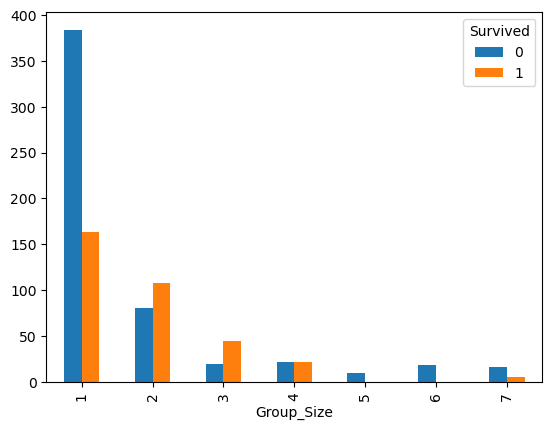

In [36]:
pd.crosstab(train_df.Group_Size, train_df.Survived).plot(kind = 'bar')


In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Group_Size
0,1,0,3,0,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.0,0.0,0.0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,1,3,1,26.0,0,0,7.9250,2,0.0,1.0,0.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,1,0,53.1000,2,0.0,0.0,0.0,1.0,0.0,0.0,2
4,5,0,3,0,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.0,0.0,0.0,1


In [38]:
def transform_title_col(data):
    # Group rare titles into a single category
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Don', 'Jonkheer', 'Rev', 
                                            'Capt', 'Col', 'Major', 'Dr'], 'Rare')
    data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

    # Fill missing 'Age' values by using the median of each title group
    data['Age'] = data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

    # Drop the 'Name' column since it's no longer needed
    data = data.drop('Name', axis = 1)
    
    # Group passengers by ticket and count the number of passengers in each group
    grouped_by_ticket = data.groupby('Ticket').size().reset_index(name='Group_Size')

    # Merge grouped ticket data (group size) back onto the main DataFrame
    data = data.merge(grouped_by_ticket, on='Ticket', how = 'left')

    # Drop the 'Ticket' column as it's no longer necessary
    data = data.drop('Ticket', axis = 1)
    
    return data


In [39]:
def transform_cabin_col(data):
    # Drop the cabin column
    data = data.drop('Cabin', axis = 1)
    return data

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

def convert_to_cat(data):
    # Create LabelEncoder to transform categorical 'Embarked' column into numerical values
    le = LabelEncoder()
    data['Embarked'] = le.fit_transform(data['Embarked'])
    
    # Create OneHotEncoder to convert 'Title' column into one-hot encoded columns
    one_hot = OneHotEncoder(sparse_output=False)
    
    # Fit the encoder on the 'Title' column (pass it as a 2D array)
    encoded_titles = one_hot.fit_transform(data[['Title']])
    
    # Create a DataFrame with the one-hot encoded columns for titles
    encoded_df = pd.DataFrame(encoded_titles, columns=one_hot.get_feature_names_out(['Title']))
    
    # Concatenate the one-hot encoded columns back to the original dataframe
    data = pd.concat([data, encoded_df], axis=1)
    
    # Drop the 'Title' column as it has been replaced with one-hot encoded columns
    data.drop('Title', axis=1, inplace=True)
    
    return data


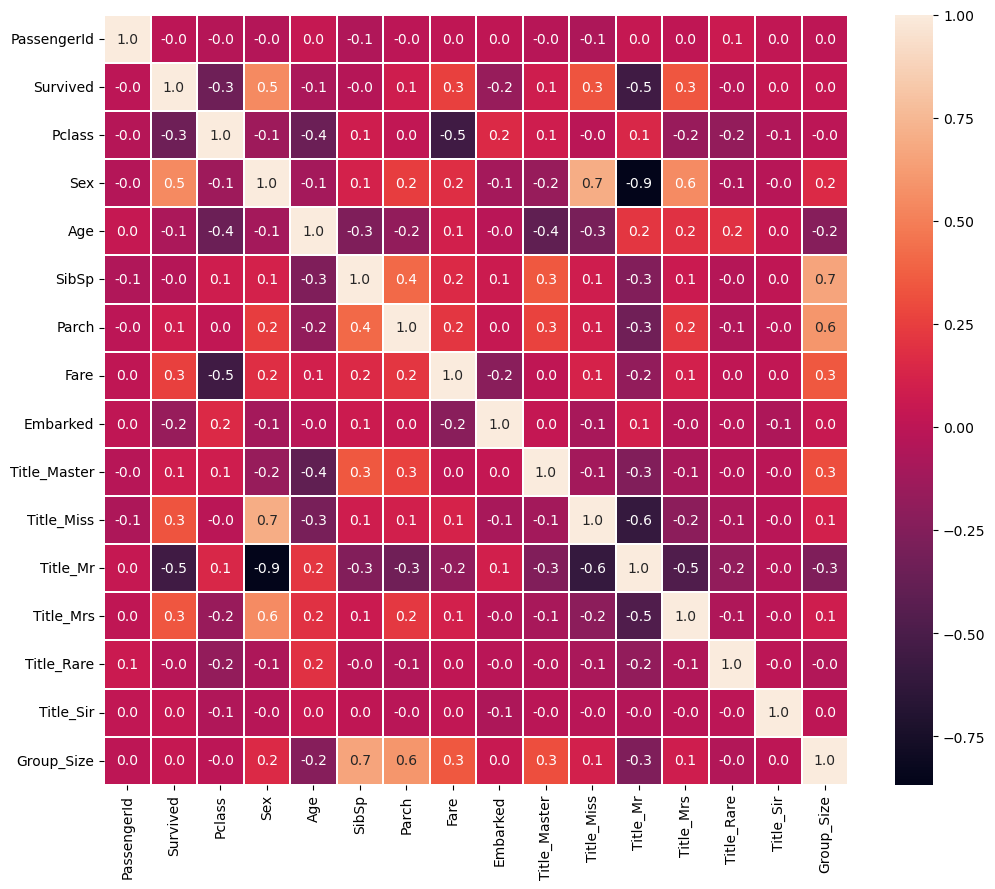

In [41]:
import seaborn as sns
cor_matrix = train_df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(cor_matrix, annot = True, linewidths= 0.3, fmt = ".1f")

## Key Findings:
#### Sex & Survival:

There is a moderate positive correlation (0.5) between Sex and Survival. This indicates that females had a higher survival rate compared to males, which is consistent with historical accounts of women and children being prioritized during evacuation.

#### Title ('Mr.') & Survival:

A negative correlation of -0.5 with the 'Mr.' title suggests that men (particularly with the title 'Mr.') had a lower chance of survival compared to women and children. This may reflect societal norms of the time, where women and children were given preference in lifeboats.

#### Pclass & Survival:

The correlation of 0.3 between Pclass (Passenger Class) and Survival indicates a moderate positive relationship, meaning that passengers in higher classes (Pclass 1) had a better chance of survival compared to those in lower classes (Pclass 3).

#### Fare & Survival:

There is a positive correlation of 0.3 between Fare and Survival, implying that passengers who paid a higher fare had a slightly higher likelihood of survival. This aligns with the idea that wealthier passengers may have had better access to lifeboats and resources.

## Conclusion:

The EDA has provided valuable insights into the titanic dataset, highlighting key features like sex, Pclass and fare as a significant factor for rate of survival. These insights are crucial for building predictive models that can estimate survival chances.